In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

#축에 마이너스 표기
plt.rcParams['axes.unicode_minus']=False

#그래프 사이즈 설정
plt.rcParams['figure.figsize']=(6,4)

sns.set(style='whitegrid')

In [2]:
#한글 표기 설정
from matplotlib import rc, font_manager
fontname='c:/Windows/Fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=fontname).get_name()
rc('font',family=font_name)


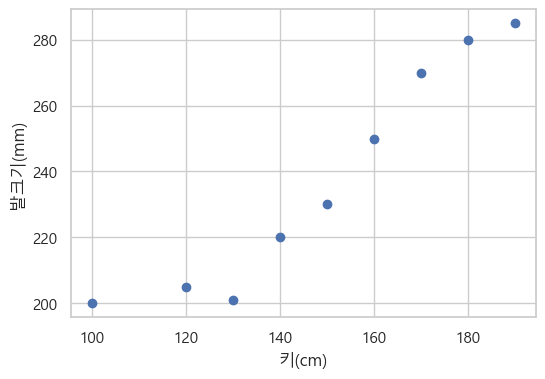

In [3]:
키=[100,120,130,140,150,160,170,180,190]
발크기=[200,205,201,220,230,250,270,280,285]
plt.scatter(키, 발크기)
plt.xlabel('키(cm)')
plt.ylabel('발크기(mm)')
plt.show()

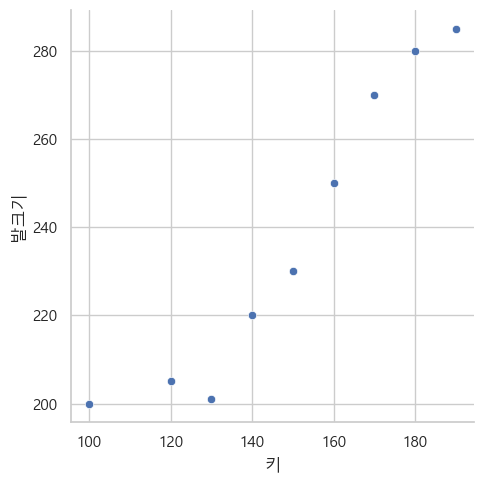

In [4]:
df=pd.DataFrame({'키':키,'발크기':발크기})
sns.relplot(x='키',y='발크기', data=df)
plt.show()

-0.98522582925973


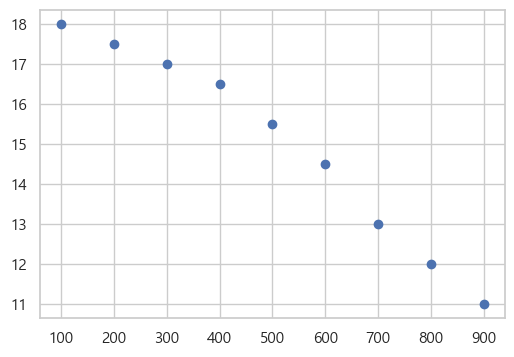

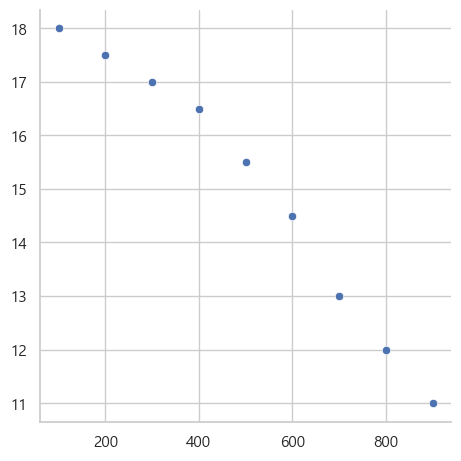

In [5]:
h=[100,200,300,400,500,600,700,800,900]
t=[18.0,17.5,17,16.5,15.5,14.5,13,12,11]
df=pd.DataFrame({'h':h,'t':t})
print(df.h.corr(df.t))
plt.scatter(h,t)
sns.relplot(x=h,y=t,data=df)

0.27078111294697743


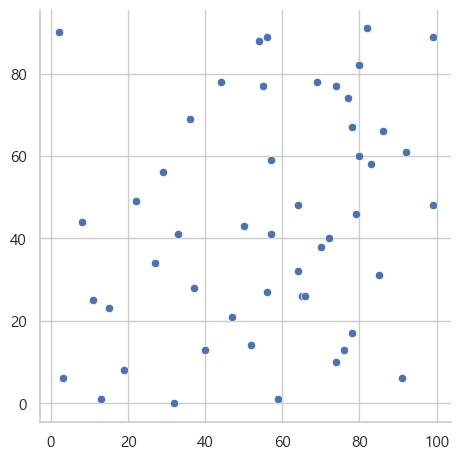

In [6]:
x=np.random.randint(0,100,50)
y=np.random.randint(0,100,50)
df=pd.DataFrame({'x':x,'y':y})
print(df.x.corr(df.y))
sns.relplot(x=x,y=y,data=df)

0.6757341092113641


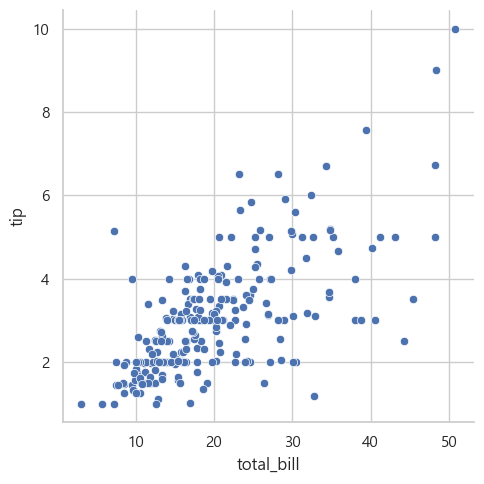

In [7]:
tips=sns.load_dataset('tips')
print(tips.total_bill.corr(tips.tip))
sns.relplot(x='total_bill', y='tip', data=tips)

# 상관관계분석과 상관계수
https://math100.tistory.com/111
- 상관관계 분석: 두 변수 사이의 상관정도를 분석하는 것
- 상관계수 : 두 변수 상관 관계 강도를 나타내는 것

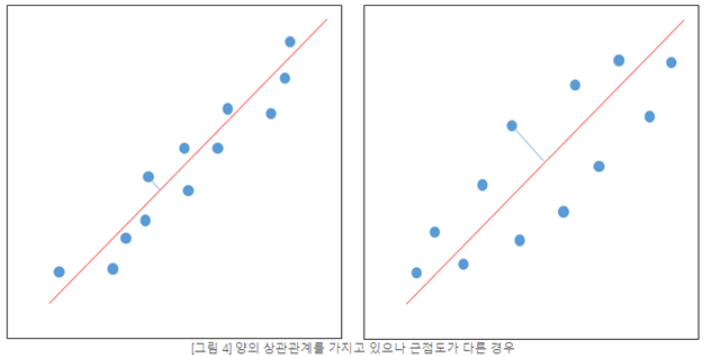

- 상관계수(기호 r)
    - -1≤r≤1 의 값을 가짐
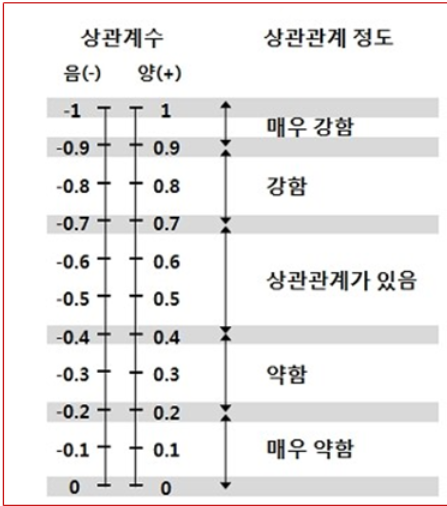


- 상관관계 분석식(모집단 전체의 상관계수 공식)
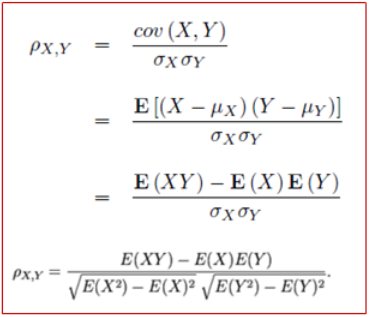

- 상관관계 분석식(표본: 일부 샘플들의 상관계수 공식)
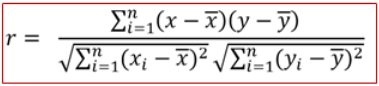

In [8]:
import math

def correlation(x,y):
    n=len(x)
    x_sum=0.0
    y_sum=0.0
    x_sum_pow=0.0
    y_sum_pow=0.0
    mul_xy_sum=0.0

    for i in range(n):
        mul_xy_sum=mul_xy_sum+float(x[i])*float(y[i])
        x_sum=x_sum+float(x[i])
        y_sum=y_sum+float(y[i])
        x_sum_pow=x_sum_pow+pow(float(x[i]),2)
        y_sum_pow=y_sum_pow+pow(float(y[i]),2)

        try:
            r=((n*mul_xy_sum)-(x_sum*y_sum)) / math.sqrt(((n*x_sum_pow)-pow(x_sum,2)) * math.sqrt((n*y_sum_pow)-pow(y_sum,2)))
        except:
            r=0.0
    return r

In [9]:
print('상관관계 분석:', correlation(키, 발크기))
print('상관관계 분석:', correlation(h, t))
print('random 발생 값 상관관계 분석: ', correlation(x,y))

상관관계 분석: 16.32449165989103
상관관계 분석: -4.560253238354311
random 발생 값 상관관계 분석:  10.019045512682066


In [10]:
height=[100,120,130,140,150,160,170,180,190]
foot_size=[200,205,210,220,230,250,270,280,285]
weight=[25,30,38,35,40,45,55,68,70]
list=[height,foot_size,weight]

column_names=['height', 'foot_size', 'weight']
df=pd.DataFrame(list).T
df.columns=column_names
print(df['height'].corr(df['foot_size']))
print(df['height'].corr(df['weight']))
print(df['weight'].corr(df['foot_size']))
corr=df.corr()
print(corr)

0.966126323516351
0.9522708360712443
0.9698070048209746
             height  foot_size    weight
height     1.000000   0.966126  0.952271
foot_size  0.966126   1.000000  0.969807
weight     0.952271   0.969807  1.000000


# 상관관계 시각화 
- scatter : 두 변수 사이의 상관관계 시각화
- relplot : 두 변수 사이의 상관관계 시각화
- heatmap : 데이터프레임 필드사이의 상관관계 시각화 

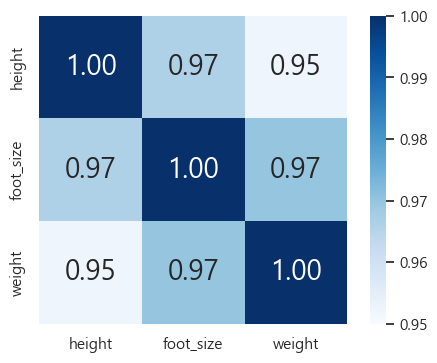

In [11]:
corr_heatmap=sns.heatmap(corr,
                                    cbar=True,                # 사이드바 표시, defualt True
                                    annot=True,              # 값 표시, defalut False
                                    annot_kws={'size':20},  #annot의 글자크기
                                    fmt='.2f',                   #숫자형식
                                    square=True,             # 정사각형 여부
                                    cmap='Blues',            #색상
                                    vmin=0.95,                #최소값
                                    vmax=1                    #최대값
                                    )

In [12]:
tips=sns.load_dataset('tips')
tips_corr=tips.corr()
tips_corr

C:\Users\admin\AppData\Local\Temp\ipykernel_15896\2052052474.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tips_corr=tips.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


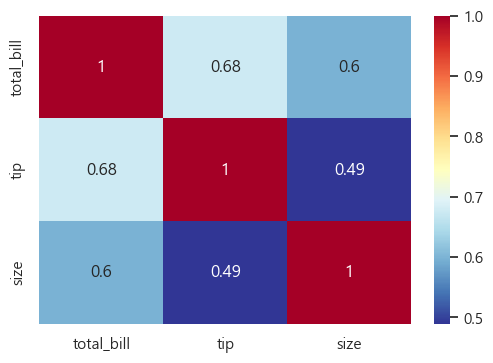

In [38]:
tips_corr_heatmap=sns.heatmap(tips_corr,
                                            cbar=True,
                                            annot=True,
                                            cmap='RdYlBu_r')

[[False False False]
 [False False False]
 [False False False]]
[[ True  True  True]
 [False  True  True]
 [False False  True]]


C:\Users\admin\AppData\Local\Temp\ipykernel_15896\3970742210.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(tips_corr, dtype=np.bool)


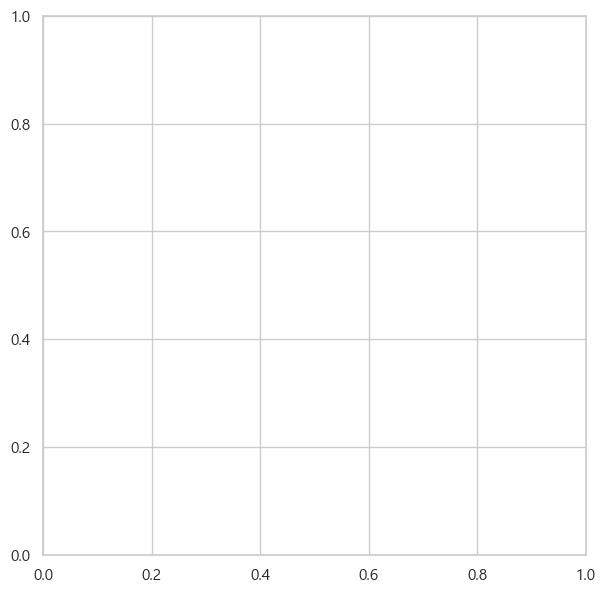

In [14]:
fig,ax=plt.subplots(figsize=(7,7))
mask=np.zeros_like(tips_corr, dtype=np.bool)
print(mask)
mask[np.triu_indices_from(mask)]=True
print(mask)

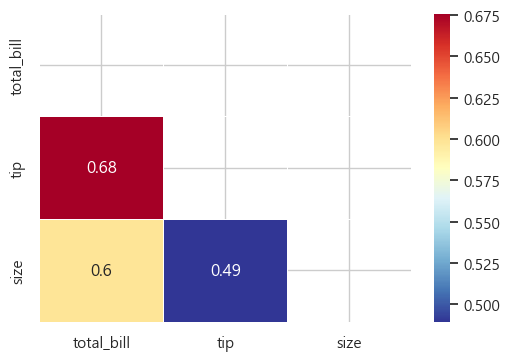

In [15]:
tips_corr_heatmap=sns.heatmap(tips_corr,
                              annot=True,
                              mask=mask,
                              linewidth=0.5,
                              cmap='RdYlBu_r')